# Initialize

In [1]:
%cd "/leonardo_scratch/fast/INF24_pmlhep_1/sgrossi0/projects/TwoSampleTest/NPLM_JetNetMetrics"

/leonardo_scratch/fast/INF24_pmlhep_1/sgrossi0/projects/TwoSampleTest/NPLM_JetNetMetrics


/leonardo_scratch/fast/INF24_pmlhep_1/envs/tf2_custom_torch2.2/lib/python3.11/site-packages/IPython/core/magics/osm.py:417: UserWarning: This is now an optional IPython functionality, setting dhist requires you to install the `pickleshare` library.
  self.shell.db['dhist'] = compress_dhist(dhist)[-100:]


In [2]:
visible_devices = [1]
from datetime import datetime
print(datetime.now().strftime("%Y-%m-%d %H:%M:%S.%f")+":", "Importing os...")
import os
print(datetime.now().strftime("%Y-%m-%d %H:%M:%S.%f")+":", "Importing sys...")
import sys
if not any("ipykernel" in arg for arg in sys.argv):
    print(datetime.now().strftime("%Y-%m-%d %H:%M:%S.%f")+":", "Importing and initializing argparse...")
    import argparse
    parser = argparse.ArgumentParser()
    parser.add_argument("-v", "--visible_devices", help="Set visible devices", nargs='*', type=list, default=visible_devices)
    args = parser.parse_args()
    visible_devices = args.visible_devices if args.visible_devices else visible_devices
    if not isinstance(visible_devices, list):
        raise ValueError("Visible devices must be a list of integers")
    for i in visible_devices:
        if not isinstance(i, int):
            raise ValueError("Visible devices must be a list of integers")
print("Visible devices:", visible_devices)
print(datetime.now().strftime("%Y-%m-%d %H:%M:%S.%f")+":", "Importing timer from timeit...")
from timeit import default_timer as timer
print(datetime.now().strftime("%Y-%m-%d %H:%M:%S.%f")+":", "Setting env variables for tf import (only device(s)", visible_devices, "will be available)...")
os.environ["CUDA_VISIBLE_DEVICES"] = ','.join([str(i) for i in visible_devices]) # type: ignore
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2'
#os.environ['TF_XLA_FLAGS'] = '--tf_xla_enable_xla_devices'
#os.environ['TF_XLA_FLAGS'] = '--tf_xla_auto_jit=2'
print(datetime.now().strftime("%Y-%m-%d %H:%M:%S.%f")+":", "Importing numpy...")
import numpy as np # type: ignore
print(datetime.now().strftime("%Y-%m-%d %H:%M:%S.%f")+":", "Importing matplotlib...")
from matplotlib import pyplot as plt
print(datetime.now().strftime("%Y-%m-%d %H:%M:%S.%f")+":", "Importing h5py...")
import h5py # type: ignore
print(datetime.now().strftime("%Y-%m-%d %H:%M:%S.%f")+":", "Importing importlib.util...")
import importlib.util
print(datetime.now().strftime("%Y-%m-%d %H:%M:%S.%f")+":", "Importing json...")
import json
print(datetime.now().strftime("%Y-%m-%d %H:%M:%S.%f")+":", "Importing pandas...")
import pandas as pd
print(datetime.now().strftime("%Y-%m-%d %H:%M:%S.%f")+":", "Importing random...")
import random
print(datetime.now().strftime("%Y-%m-%d %H:%M:%S.%f")+":", "Importing scipy utils...")
from scipy.stats import norm, lognorm, chi2, kstwo, kstwobign, ks_2samp, moment
from scipy.special import kolmogorov
from scipy.optimize import minimize, curve_fit, root, bisect
print(datetime.now().strftime("%Y-%m-%d %H:%M:%S.%f")+":", "Importing subprocess...")
import subprocess
print(datetime.now().strftime("%Y-%m-%d %H:%M:%S.%f")+":", "Importing textwrap...")
import textwrap
print(datetime.now().strftime("%Y-%m-%d %H:%M:%S.%f")+":", "Importing tensorflow...")
import tensorflow as tf # type: ignore
print("Tensorflow version:", tf.__version__)
print(datetime.now().strftime("%Y-%m-%d %H:%M:%S.%f")+":", "Importing tensorflow_probability...")
import tensorflow_probability as tfp # type: ignore
tfd = tfp.distributions
print("Tensorflow probability version:", tfp.__version__)
print(datetime.now().strftime("%Y-%m-%d %H:%M:%S.%f")+":", "Importing timeit...")
from timeit import default_timer as timer
print(datetime.now().strftime("%Y-%m-%d %H:%M:%S.%f")+":", "Importing tqdm...")
from tqdm import tqdm
print(datetime.now().strftime("%Y-%m-%d %H:%M:%S.%f")+":", "Importing typing...")
from typing import List, Tuple, Dict, Callable, Union, Optional, Any, Type
print(datetime.now().strftime("%Y-%m-%d %H:%M:%S.%f")+":", "Setting tf configs...")
gpu_devices = tf.config.experimental.list_physical_devices('GPU')
for gpu_device in gpu_devices:
    tf.config.experimental.set_memory_growth(gpu_device, True)

print(datetime.now().strftime("%Y-%m-%d %H:%M:%S.%f")+":", "Importing GMetrics module...")

import GMetrics # type: ignore
from GMetrics.plotters import plot_corners, cornerplotter, plot_corr_matrix, plot_corr_matrix_side_by_side # type: ignore
from GMetrics.more.deformations import deformed_distribution, deform_mean, deform_cov_diag, deform_cov_off_diag, deform_power_abs, deform_random
from GMetrics.more.optimizers_deformations import compute_exclusion_bisection_dataset_np # type: ignore
from GMetrics.utils import se_mean, se_std

print(datetime.now().strftime("%Y-%m-%d %H:%M:%S.%f")+":", "Importing jetnet.evaluation.gen_metrics module...")
import jetnet

def get_gpu_info():
    try:
        gpu_info = subprocess.check_output(["nvidia-smi", "--query-gpu=gpu_name", "--format=csv,noheader"]).decode('utf-8')
        return gpu_info.strip().split('\n')
    except Exception as e:
        print(e)
        return None
training_devices = []
gpu_models = get_gpu_info()
for i in visible_devices:
    if gpu_models:
        training_devices.append(gpu_models[i])
        print(f"Successfully loaded GPU #{i}, model: {gpu_models[i]}")
    else:
        training_devices.append('undetermined')
        print(f"Failed to load GPU {i} model. Defaulting to 'undetermined'.")
print(f"Loaded {len(training_devices)} GPUs: {training_devices}")
        
print(datetime.now().strftime("%Y-%m-%d %H:%M:%S.%f")+":", "All done.")

2024-11-12 16:08:24.701640: Importing os...
2024-11-12 16:08:24.701792: Importing sys...
Visible devices: [1]
2024-11-12 16:08:24.702024: Importing timer from timeit...
2024-11-12 16:08:24.702091: Setting env variables for tf import (only device(s) [1] will be available)...
2024-11-12 16:08:24.702216: Importing numpy...
2024-11-12 16:08:24.827155: Importing matplotlib...
2024-11-12 16:08:25.172052: Importing h5py...
2024-11-12 16:08:25.202659: Importing importlib.util...
2024-11-12 16:08:25.202756: Importing json...
2024-11-12 16:08:25.202823: Importing pandas...
2024-11-12 16:08:25.610910: Importing random...
2024-11-12 16:08:25.611046: Importing scipy utils...
2024-11-12 16:08:26.086583: Importing subprocess...
2024-11-12 16:08:26.086716: Importing textwrap...
2024-11-12 16:08:26.086784: Importing tensorflow...
Tensorflow version: 2.16.1
2024-11-12 16:08:29.459111: Importing tensorflow_probability...
Tensorflow probability version: 0.24.0
2024-11-12 16:08:30.449456: Importing timeit.

/leonardo_scratch/fast/INF24_pmlhep_1/envs/tf2_custom_torch2.2/lib/python3.11/site-packages/jetnet/utils/utils.py:7: FutureWarning: In version 2024.7.0 (target date: 2024-06-30 11:59:59-05:00), this will be an error.
To raise these warnings as errors (and get stack traces to find out where they're called), run
    import warnings
    warnings.filterwarnings("error", module="coffea.*")
after the first `import coffea` or use `@pytest.mark.filterwarnings("error:::coffea.*")` in pytest.
Issue: coffea.nanoevents.methods.vector will be removed and replaced with scikit-hep vector. Nanoevents schemas internal to coffea will be migrated. Otherwise please consider using that package!.
  from coffea.nanoevents.methods import vector


2024-11-12 16:08:36.283903: Importing jetnet.evaluation.gen_metrics module...
Successfully loaded GPU #1, model: NVIDIA A100-SXM-64GB
Loaded 1 GPUs: ['NVIDIA A100-SXM-64GB']
2024-11-12 16:08:36.315394: All done.


# Load data

In [3]:
data = jetnet.datasets.JetNet.getData(jet_type = "g",
                                      data_dir = "data/g",
                                      particle_features = "all",
                                      jet_features = "all",
                                      num_particles = 30,
                                      split = "all",
                                      split_fraction = None,
                                      seed = 42,
                                      download = False,
                                     )

In [4]:
def get_particle_features(relative_features,
                          jet_features):
    eta_rel = relative_features[:, :, 0]
    phi_rel = relative_features[:, :, 1]
    pt_rel = relative_features[:, :, 2]
    mask = relative_features[:, :, 3]
    eta_jet = jet_features[:, 2]
    pt_jet = jet_features[:, 1]
    eta_particle = eta_jet[:, None] + eta_rel
    phi_paericle = phi_rel
    pt_particle = pt_jet[:, None] * pt_rel
    particle_features = tf.stack([eta_particle, phi_paericle, pt_particle, mask], axis = 2)
    return particle_features

In [5]:
relative_features = tf.cast(data[0], tf.float64)                            #    ``["etarel", "phirel", "ptrel", "mask"]``.
jet_features = tf.cast(data[1], tf.float64)                                 #    ``["type", "pt", "eta", "mass", "num_particles"]``.
particle_features = get_particle_features(relative_features, jet_features)  #    ``["eta", "phi", "pt", "mask"]``.
print(f"relative_features.shape: {relative_features.shape}")
print(f"jet_features.shape: {jet_features.shape}")
print(f"particle_features.shape: {particle_features.shape}")

relative_features.shape: (177252, 30, 4)
jet_features.shape: (177252, 5)
particle_features.shape: (177252, 30, 4)


## Init data

In [6]:
results_dir = "results/particle_features_30/"
figures_dir = os.path.join(results_dir, "figures/")
if not os.path.exists(figures_dir):
    os.makedirs(figures_dir)
    print("Results directories were created")
else:
    print("Directory alredy exists")

Directory alredy exists


In [7]:
def preprocess_data(data,means,stds):
    preprocess_data=(data-means)/stds
    return preprocess_data

def postprocess_data(data,means,stds):
    postprocess_data=data*stds+means
    return postprocess_data

def get_reduced_particle_features(particle_features):
    tmp = particle_features[:, :, :3]
    shape = tmp.shape
    particle_features_reshaped = tf.reshape(tmp, [-1, shape[1] * shape[2]])
    return particle_features_reshaped

particle_features_reduced = get_reduced_particle_features(particle_features)
particle_features_reduced.shape

TensorShape([177252, 90])

# TwoSample Test

In [8]:
tests_dir = os.path.join(results_dir, "tests/")
model_dir = os.path.join(tests_dir, '20K/')
if not os.path.exists(model_dir):
    os.makedirs(model_dir)
    print(f"Directory {model_dir} has been created")
else:
    print(f"Directory {model_dir} already exists")
    
dataset = get_reduced_particle_features(particle_features)

Directory results/particle_features_30/tests/20K/ already exists


## Bootstrapping Null Hypothesis

In [9]:
null_hypotheses_dir = os.path.join(model_dir, 'null_hypotheses/')
if not os.path.exists(null_hypotheses_dir):
    os.makedirs(null_hypotheses_dir)
    print(f"Directory {null_hypotheses_dir} has been created")
else:
    print(f"Directory {null_hypotheses_dir} already exists")    
    
metrics_config_file = os.path.join(model_dir, "metrics_config.json")

Directory results/particle_features_30/tests/20K/null_hypotheses/ already exists


In [10]:
niter_tot = 1_000
batch_size_test = 20_000
namples = len(dataset) // 2
niter = namples // batch_size_test
nbootstrap = niter_tot // niter
niter_tot = niter * nbootstrap
print(f"niter: {niter}, nbootstrap: {nbootstrap}")

def shuffle_dataset(seed):
    return tf.random.shuffle(dataset, seed=seed)

start = timer()
l = len(dataset) // 2
dstmp = shuffle_dataset(seed = 0)
dist_1_null = tf.cast(dstmp[:l], tf.float64)
dist_2_null = tf.cast(dstmp[l:], tf.float64)
del(dstmp)

TwoSampleTestInputsNull = GMetrics.TwoSampleTestInputs(dist_1_input = dist_1_null[:niter*batch_size_test],
                                                       dist_2_input = dist_2_null[:niter*batch_size_test],
                                                       niter = niter,
                                                       batch_size_test = batch_size_test,
                                                       small_sample_threshold = 1e7,
                                                       dtype_input = tf.float64,
                                                       seed_input = 0,
                                                       use_tf = True,
                                                       mirror_strategy = False,
                                                       verbose = True)

NPLMMetric = GMetrics.NPLMMetric(TwoSampleTestInputsNull,
                                 progress_bar = True,
                                 verbose = True,
                                 M = 2000, 
                                 lam = 1e-6, 
                                 iter_list = 1000000,
                                 weight = 1) 

niter: 4, nbootstrap: 250
Parsing input distribution...
Input distribution is a numeric numpy array or tf.Tensor.
Parsing input distribution...
Input distribution is a numeric numpy array or tf.Tensor.
Checking and setting numerical distributions.
Returning dist_num.
Returning dist_num.


In [11]:
test_config_null = {}
test_config_tmp = dict(TwoSampleTestInputsNull.__dict__)
keys_to_remove = ["_dist_1_input", "_dist_2_input", "_dist_1_num", "_dist_2_num", "_dist_1_symb", "_dist_2_symb", "_seed_generator"]
for key in keys_to_remove:
    test_config_tmp.pop(key, None)
for key, value in test_config_tmp.items():
    new_key = key.lstrip('_')
    
    if isinstance(value, tf.Tensor):
        new_value = value.numpy() # type: ignore
    elif isinstance(value, np.ndarray):
        new_value = value.tolist()
    elif isinstance(value, np.generic):
        new_value = value.item() # Convert NumPy scalars to Python scalars
    elif isinstance(value, tf.DType):
        new_value = value.name
    elif isinstance(value, np.dtype):
        new_value = np.dtype(value).name
    else:
        new_value = value
    
    test_config_null[new_key] = new_value

pd.DataFrame([test_config_null])

,niter,batch_size_test,batch_size_gen,small_sample_threshold,dtype_input,seed,use_tf,mirror_strategy,strategy,verbose,is_symb_1,ndims_1,nsamples_1,is_symb_2,ndims_2,nsamples_2,dtype,ndims,nsamples,small_sample
0,4,20000,1000,10000000,float64,0,True,False,None,True,False,90,80000,False,90,80000,float64,90,80000,True


In [12]:
unique_key = "config_flavor_nsamples_"+str(TwoSampleTestInputsNull.batch_size_test)+"_niter_"+str(niter_tot)
metrics_config = {unique_key: {"NPLM": {"name": "nplm",
                                       "object_name": "NPLMMetric",
                                       "class_name": "GMetrics.NPLMMetric",
                                       "kwargs": {"M": 2000,
                                                  "lam": 1e-6,
                                                  "iter_list": 1000000,
                                                  "weight" : 1},
                                       "result_key": "metric_list", 
                                       "scale_func": lambda ns, ndims: 1,#(ns/ndims)**(3/2),
                                       "scale_func_string": "lambda ns, ndims: 1",
                                       "test_config": test_config_null,
                                       "max_vectorize": 1000, # optimized for 5D
                                       "latex": "$t_{\mathrm{NPLM}}$",
                                       "null_file": null_hypotheses_dir+"NPLM.json"}}}

print(metrics_config[unique_key])
nplm_config = metrics_config[unique_key]["NPLM"]
print(nplm_config)

{'NPLM': {'name': 'nplm', 'object_name': 'NPLMMetric', 'class_name': 'GMetrics.NPLMMetric', 'kwargs': {'M': 2000, 'lam': 1e-06, 'iter_list': 1000000, 'weight': 1}, 'result_key': 'metric_list', 'scale_func': <function <lambda> at 0x7fdb8b38a200>, 'scale_func_string': 'lambda ns, ndims: 1', 'test_config': {'niter': 4, 'batch_size_test': 20000, 'batch_size_gen': 1000, 'small_sample_threshold': 10000000, 'dtype_input': 'float64', 'seed': 0, 'use_tf': True, 'mirror_strategy': False, 'strategy': None, 'verbose': True, 'is_symb_1': False, 'ndims_1': 90, 'nsamples_1': 80000, 'is_symb_2': False, 'ndims_2': 90, 'nsamples_2': 80000, 'dtype': 'float64', 'ndims': 90, 'nsamples': 80000, 'small_sample': True}, 'max_vectorize': 1000, 'latex': '$t_{\\mathrm{NPLM}}$', 'null_file': 'results/particle_features_30/tests/20K/null_hypotheses/NPLM.json'}}
{'name': 'nplm', 'object_name': 'NPLMMetric', 'class_name': 'GMetrics.NPLMMetric', 'kwargs': {'M': 2000, 'lam': 1e-06, 'iter_list': 1000000, 'weight': 1}, 'r

In [13]:
file = nplm_config["null_file"]
name = nplm_config["name"]
max_vectorize = nplm_config["max_vectorize"]
obj = eval(nplm_config["object_name"])
if os.path.exists(file):
     print(f"Loading {name} from {file}")
     obj.Results.load_from_json(file)
else:
    print(f"Computing and saving {name}")
    print("\n===========================================================")
    print(f"Testing from 0 to {niter} of {niter * nbootstrap} samples.")
    obj.Test_np()
    for i in range(1, nbootstrap):
        l = len(dataset) // 2
        dstmp = shuffle_dataset(seed = 1000 * i + i)
        dist_1_null = tf.cast(dstmp[:l], tf.float64)
        dist_2_null = tf.cast(dstmp[l:], tf.float64)
        #KSTestNull.Inputs.dist_1_input = dist_1 # This is the consistent way, but slower
        TwoSampleTestInputsNull._dist_1_num = dist_1_null[:niter*batch_size_test] # Overwriting the _dist_1_num attribute. Less consistent, but         faster
        #KSTestNull.Inputs.dist_2_input = dist_2 # This is the consistent way, but slower
        TwoSampleTestInputsNull._dist_2_num = dist_2_null[:niter*batch_size_test] # Overwriting the _dist_2_num attribute. Less consistent, but         faster
        print("\n===========================================================")
        print(f"Testing from {i * niter} to {(i+1) * niter} of {niter * nbootstrap} samples.")
        obj.Test_np()
        del(dstmp)
    end = timer()
    print(f"All done in: {end-start:.2f} s.")
    print(f"Saving {name} to {file}")
    obj.Results.save_to_json(file)

Loading nplm from results/particle_features_30/tests/20K/null_hypotheses/NPLM.json


In [14]:
cl_list = [0.68, 0.95, 0.99]
null_times = []
ndims = 90


name = nplm_config["name"]
obj = eval(nplm_config["object_name"])
result_key = nplm_config["result_key"]
scale_func = nplm_config["scale_func"]

nsamples = obj.Inputs.batch_size_test
ns = nsamples**2 /(2*nsamples)
dist_null  = np.array(obj.Results[0].result_value[result_key])
for i in range(1,len(obj.Results)):
        dist_null = np.concatenate((dist_null, np.array(obj.Results[i].result_value[result_key])))

metric_thresholds = [[cl, 
                        [int(cl*len(dist_null)), 
                        int((1-cl)*len(dist_null))], 
                        np.sort(dist_null)[int(len(dist_null)*cl)]] for cl in cl_list]

print(f"ThresholdS for metric {nplm_config['name']}: {metric_thresholds}")

null_time = obj.Results[0].__dict__['computing_time']
for i in range(1,len(obj.Results)):
        null_time += obj.Results[i].__dict__['computing_time']
null_times.append([name, int(null_time)])
print(f"Computing time for metric {nplm_config['name']}: {null_time}")

nplm_config.update({"thresholds": metric_thresholds})
    
GMetrics.utils.save_update_metrics_config(metrics_config = metrics_config, metrics_config_file = metrics_config_file) # type: ignore

ThresholdS for metric nplm: [[0.68, [680, 319], 4680.157808482765], [0.95, [950, 50], 4841.129866940355], [0.99, [990, 10], 4895.568727842781]]
Computing time for metric nplm: 5825.452997668646


,name,object_name,class_name,kwargs,result_key,scale_func,scale_func_string,test_config,max_vectorize,latex,null_file,thresholds
0,nplm,NPLMMetric,GMetrics.NPLMMetric,"{'M': 2000, 'lam': 1e-06, 'iter_list': 1000000...",metric_list,<function <lambda> at 0x7fdb8b38a200>,"lambda ns, ndims: 1","{'niter': 4, 'batch_size_test': 20000, 'batch_...",1000,$t_{\mathrm{NPLM}}$,results/particle_features_30/tests/20K/null_hy...,"[[0.68, [680, 319], 4680.157808482765], [0.95,..."


### Plots of null-distributions

mu = 4622.574298133398 +/- 495.32916716655683
sigma = 125.15463873786746 +/- 2.7000485216672443
68%CL = 4680.157808482765, 95%CL = 4841.129866940355, 99%CL = 4895.568727842781
mu = 4622.574298133398 +/- 495.32916716655683
sigma = 125.15463873786746 +/- 2.7000485216672443


/tmp/ipykernel_890125/1261576838.py:66: UserWarning: Attempt to set non-positive ylim on a log-scaled axis will be ignored.
  ax[0].set_ylim(current_ylim0)
/tmp/ipykernel_890125/1261576838.py:68: MatplotlibDeprecationWarning: The legendHandles attribute was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use legend_handles instead.
  for handle in legend0.legendHandles[-3:]:
/tmp/ipykernel_890125/1261576838.py:97: UserWarning: Attempt to set non-positive ylim on a log-scaled axis will be ignored.
  ax[1].set_ylim(current_ylim1)
/tmp/ipykernel_890125/1261576838.py:103: MatplotlibDeprecationWarning: The legendHandles attribute was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use legend_handles instead.
  for handle in legend1.legendHandles[-3:]:


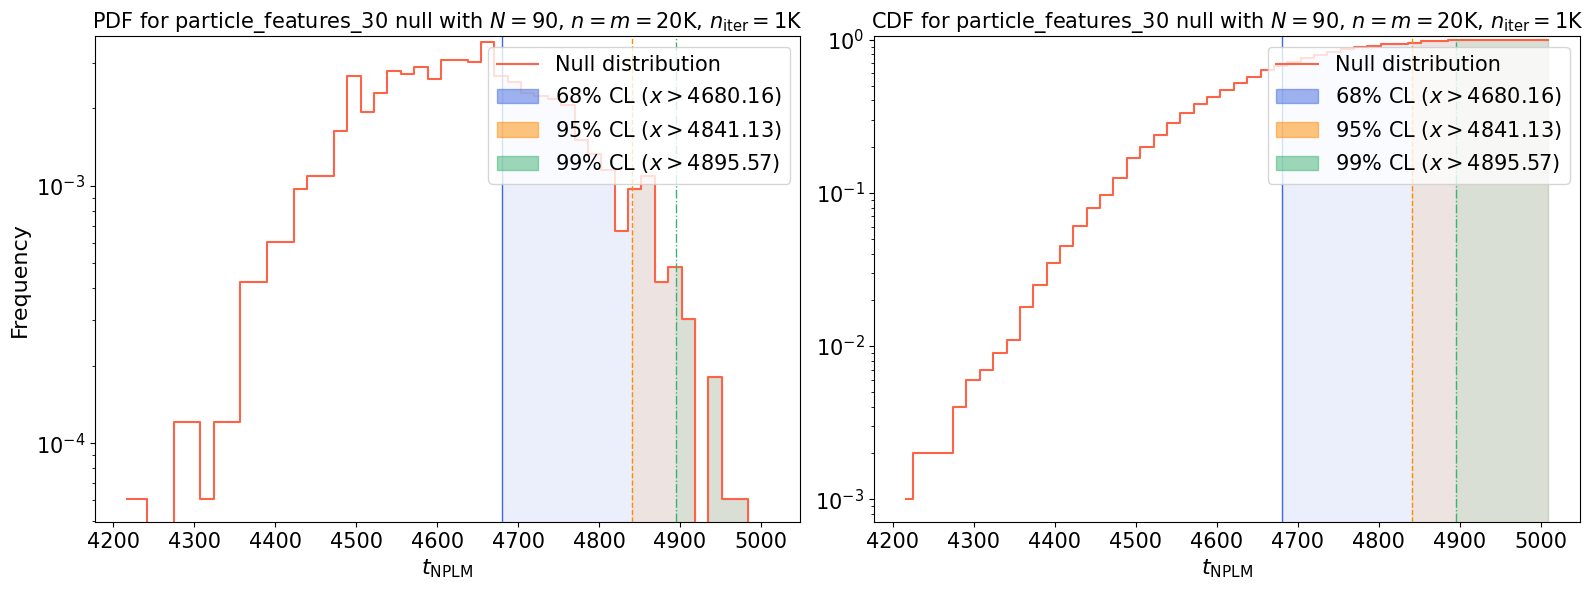

Time elapsed: 1.2224710410228 seconds.


,name,object_name,class_name,kwargs,result_key,scale_func,scale_func_string,test_config,max_vectorize,latex,null_file,thresholds,null_figure
0,nplm,NPLMMetric,GMetrics.NPLMMetric,"{'M': 2000, 'lam': 1e-06, 'iter_list': 1000000...",metric_list,<function <lambda> at 0x7fdb8b38a200>,"lambda ns, ndims: 1","{'niter': 4, 'batch_size_test': 20000, 'batch_...",1000,$t_{\mathrm{NPLM}}$,results/particle_features_30/tests/20K/null_hy...,"[[0.68, [680, 319], 4680.157808482765], [0.95,...",results/particle_features_30/tests/20K/null_hy...


In [15]:
name = nplm_config["name"]
name_cap = name.upper()
latex = nplm_config["latex"]
obj = eval(nplm_config["object_name"])
result_key = nplm_config["result_key"]
scale_func = nplm_config["scale_func"]
figure_file = nplm_config["null_file"].replace("json","pdf")
thresholds = nplm_config["thresholds"]

start = timer()

nsamples = obj.Inputs.batch_size_test
niter = obj.Inputs.niter
ns = nsamples**2 /(2*nsamples)
dist_null  = np.array(obj.Results[0].result_value[result_key])*scale_func(ns, ndims)
for i in range(1,len(obj.Results)):
    dist_null = np.concatenate((dist_null, np.array(obj.Results[i].result_value[result_key])))
dist_null = dist_null * scale_func(ns, ndims)

scale = 'log'
num_bins = 50  # number of bins|

mu, deltamu, sigma, deltasigma = (np.mean(dist_null), se_mean(dist_null), np.std(dist_null), se_std(dist_null))
sigma_68, sigma_95, sigma_99 = [np.sort(dist_null)[int(len(dist_null)*cl)] for cl in [0.68, 0.95, 0.99]]
print(f"mu = {mu} +/- {deltamu}")
print(f"sigma = {sigma} +/- {deltasigma}")
print(f"68%CL = {sigma_68}, 95%CL = {sigma_95}, 99%CL = {sigma_99}")

print("mu =", mu, "+/-", deltamu)
print("sigma =", sigma, "+/-", deltasigma)

min_x, max_x = min(dist_null), max(dist_null) # lower and upper limit of the binning
x = np.linspace(min_x, max_x, num_bins + 1)
counts, bin_edges = np.histogram(dist_null, bins=x, density=True)
cum_counts = np.cumsum(counts)/np.sum(counts)
bin_centers = (bin_edges[:-1] + bin_edges[1:]) / 2

fig, ax = plt.subplots(1, 2, figsize=(16, 6))

dash_styles = ['-', '--', '-.']
colors = ["royalblue", "darkorange", "mediumseagreen"]

# Create step plot
step_edges = np.convolve(bin_centers, [0.5, 0.5], 'valid')
step_counts = counts[:-1]  # assuming counts is one element longer than step_edges

ax[0].step(step_edges, step_counts, where='mid', linestyle='-', color = "tomato", label = "Null distribution")
current_ylim0 = ax[0].get_ylim()
ax[0].set_yscale(scale)
ax[0].set_xlabel(r"%s"%latex, fontsize=16)
ax[0].set_ylabel('Frequency', fontsize=16)
ax[0].set_title('PDF for particle_features_30 null with $N = '+str(ndims)+'$, $n=m='+str(int(nsamples/1000))+'$K, $n_{\mathrm{iter}} = '+str(int(niter_tot/1000))+'$K', fontsize=15)
ax[0].tick_params(axis='x', labelsize=15)  # Set x-axis tick label size
ax[0].tick_params(axis='y', labelsize=15)  # Set y-axis tick label size

for i, threshold in enumerate(thresholds):
    confidence_level, _, threshold_value = threshold
    start_index = np.searchsorted(step_edges, threshold_value, side="right") - 1
    start_index = max(start_index, 0)
    fill_x_range = np.concatenate([[threshold_value], step_edges[start_index+1:]])
    fill_y_values = step_counts[start_index:]
    if len(fill_x_range) > 1 and len(fill_y_values) > 0:
        ax[0].fill_between(fill_x_range, 0, fill_y_values, color=colors[i], alpha=0.1, step='mid', label=f"{int(confidence_level * 100)}% CL ($x>{format(threshold_value, '.2f')}   $)")
    ax[0].axvline(x=threshold_value, linestyle=dash_styles[i], color=colors[i], linewidth=1)

ax[0].set_ylim(current_ylim0)  
legend0 = ax[0].legend(loc='upper right', fontsize=15)
for handle in legend0.legendHandles[-3:]:
    handle.set_alpha(0.5)  # Set to desired alpha value

# Create step plot
step_edges = np.convolve(bin_centers, [0.5, 0.5], 'valid')
step_counts = cum_counts[:-1]  # assuming counts is one element longer than step_edges

ax[1].step(step_edges, step_counts, where='mid', linestyle='-', color = "tomato", label = "Null distribution")
#ax[1].plot(bin_centers, cum_counts, linestyle = '-', color = "tomato", label = "Null distribution", drawstyle='steps-mid')
current_ylim1 = ax[1].get_ylim()
#for i, threshold in enumerate(thresholds):
#    confidence_level, _, threshold_value = threshold
#    ax[1].axhline(y=confidence_level, color=colors[i], linestyle=dash_styles[i], linewidth=0.5, alpha=1)
ax[1].set_yscale(scale)
ax[1].set_xlabel(r"%s"%latex, fontsize=16)
ax[1].set_title('CDF for particle_features_30 null with $N = '+str(ndims)+'$, $n=m='+str(int(nsamples/1000))+'$K, $n_{\mathrm{iter}} = '+str(int(niter_tot/1000))+'$K', fontsize=15)
ax[1].tick_params(axis='x', labelsize=15)  # Set x-axis tick label size
ax[1].tick_params(axis='y', labelsize=15)  # Set y-axis tick label size

for i, threshold in enumerate(thresholds):
    confidence_level, _, threshold_value = threshold
    start_index = np.searchsorted(step_edges, threshold_value, side="right") - 1
    start_index = max(start_index, 0)
    fill_x_range = np.concatenate([[threshold_value], step_edges[start_index+1:]])
    fill_y_values = step_counts[start_index:]
    if len(fill_x_range) > 1 and len(fill_y_values) > 0:
        ax[1].fill_between(fill_x_range, 0, fill_y_values, color=colors[i], alpha=0.1, step='mid', label=f"{int(confidence_level * 100)}% CL ($x>{format(threshold_value, '.2f')}   $)")
    ax[1].axvline(x=threshold_value, linestyle=dash_styles[i], color=colors[i], linewidth=1)

ax[1].set_ylim(current_ylim1)  
#for i, threshold in enumerate(thresholds):
#    confidence, _, value = threshold
#    ax[1].axvline(x=value, color=colors[i], linestyle=dash_styles[i], alpha=1, label=f"{int(confidence_level * 100)} CL% ($x>{format(threshold_value,'.2f')}$)")

legend1 = ax[1].legend(loc='upper right', fontsize=15)
for handle in legend1.legendHandles[-3:]:
    handle.set_alpha(0.5)  # Set to desired alpha value

plt.subplots_adjust(wspace=0.1)  # Adjust this value to your liking
plt.tight_layout()
plt.savefig(figure_file)
plt.show()
plt.close()

nplm_config.update({"null_figure": figure_file})

end = timer()
print("Time elapsed:", end-start, "seconds.")

GMetrics.utils.save_update_metrics_config(metrics_config = metrics_config, metrics_config_file = metrics_config_file) # type: ignore

## Alternative hypothesis

### Scan and exclusion limits (bisection method)

In [16]:
if test_config_null["use_tf"]:
    dtype = getattr(tf, test_config_null["dtype_input"])
else:
    dtype = np.dtype(test_config_null["dtype_input"])
test_kwargs = {"niter_null": niter,
               "niter_alt": 100, # this will be adapted to the boostrap size
               "batch_size_test": test_config_null["batch_size_test"],
               "batch_size_gen": test_config_null["batch_size_gen"],
               "small_sample_threshold": test_config_null["small_sample_threshold"],
               "dtype_input": dtype,
               "seed_input": test_config_null["seed"],
               "use_tf": test_config_null["use_tf"],
               "mirror_strategy": test_config_null["mirror_strategy"],
               "verbose": False}

In [17]:
file_path = os.path.join(model_dir, "exclusion_limits.json")
if os.path.exists(file_path):
    try:
        with open(file_path, "r") as file:
            existing_data = json.load(file)
    except json.JSONDecodeError:
        existing_data = {}
else:
    existing_data = {}
    
# Sort the dictionary by keys
existing_data = dict(sorted(existing_data.items()))

# Save the sorted dictionary back to a JSON file
with open(file_path, 'w') as f:
    json.dump(existing_data, f, cls=GMetrics.utils.CustomEncoder, indent=4) # type: ignore

In [18]:
deformations = ["mean", "cov_diag", "cov_off_diag", "power_abs_up", "power_abs_down", "random_normal", "random_uniform"]
bounds = ["upper", "central", "lower"]
global_results = {}

for deformation in deformations:
    eps_max = 1.
    for bound in bounds:
        try:
            result = {k: v for k, v in {k: v for k, v in existing_data.items() if v["null_config"]["name"] == nplm_config["name"] and v["deformation"] == deformation and v["bound"] == bound}.items() if v["exclusion_list"] != []}
        except:
            result = {}
        if result == {}:
            print(f"Computing {bound} bounds for {nplm_config['name']} with {deformation} deformation.")
            result = compute_exclusion_bisection_dataset_np(dataset = dataset,
                                                            metric_config = nplm_config,
                                                            test_kwargs = test_kwargs,
                                                            model_dir = model_dir,
                                                            deformation = deformation,
                                                            seed_dist = 0,
                                                            x_tol = 0.01,
                                                            fn_tol = 0.05,
                                                            bound = bound,
                                                            eps_min = 0.,
                                                            eps_max = eps_max,
                                                            smear = 0.,
                                                            max_iterations = 50,
                                                            save = True,
                                                            filename = "exclusion_limits.json",
                                                            verbose = True)
            eps_max = list(result.values())[0]["exclusion_list"][-1][3]
        else:
            print(f"{bound.capitalize()} bounds for {nplm_config['name']} with {deformation} deformation already loaded.")
        global_results.update(result)
        
print(global_results.keys())

Upper bounds for nplm with mean deformation already loaded.
Central bounds for nplm with mean deformation already loaded.
Lower bounds for nplm with mean deformation already loaded.
Upper bounds for nplm with cov_diag deformation already loaded.
Central bounds for nplm with cov_diag deformation already loaded.
Lower bounds for nplm with cov_diag deformation already loaded.
Upper bounds for nplm with cov_off_diag deformation already loaded.
Central bounds for nplm with cov_off_diag deformation already loaded.
Lower bounds for nplm with cov_off_diag deformation already loaded.
Upper bounds for nplm with power_abs_up deformation already loaded.
Central bounds for nplm with power_abs_up deformation already loaded.
Lower bounds for nplm with power_abs_up deformation already loaded.
Upper bounds for nplm with power_abs_down deformation already loaded.
Central bounds for nplm with power_abs_down deformation already loaded.
Lower bounds for nplm with power_abs_down deformation already loaded.


## Show and save results

In [19]:
import notebooks.shared as shared

In [20]:
results_df, times_df = shared.generate_result_dataframe_nplm(global_results, null_times)

Metric: nplm
Metric: nplm
Metric: nplm
Metric: nplm
Metric: nplm
Metric: nplm
Metric: nplm
Metric: nplm
Metric: nplm
Metric: nplm
Metric: nplm
Metric: nplm
Metric: nplm
Metric: nplm
Metric: nplm
Metric: nplm
Metric: nplm
Metric: nplm
Metric: nplm
Metric: nplm
Metric: nplm


In [21]:
results_df_mean, results_df_cov_diag, results_df_cov_off_diag, results_df_power_abs_up, results_df_power_abs_down, results_df_random_normal, results_df_random_uniform = shared.get_individual_dfs(results_df, show = True)

,Statistic,$\epsilon^{\mu}_{95\%\mathrm{CL}}$,$\epsilon^{\mu}_{99\%\mathrm{CL}}$,$t^{\mu}$ (s)
2,NaN,$0.01752_{-0.0063}^{+0.0046}$,$0.01926_{-0.0049}^{+0.0042}$,$46624$


,Statistic,$\epsilon^{\Sigma_{ii}}_{95\%\mathrm{CL}}$,$\epsilon^{\Sigma_{ii}}_{99\%\mathrm{CL}}$,$t^{\Sigma_{ii}}$ (s)
0,NaN,$0.03601_{-0.013}^{+0.0095}$,$0.03966_{-0.01}^{+0.0075}$,$42492$


,Statistic,$\epsilon^{\Sigma_{i\neq j}}_{95\%\mathrm{CL}}$,$\epsilon^{\Sigma_{i\neq j}}_{99\%\mathrm{CL}}$,$t^{\Sigma_{i\neq j}}$ (s)
1,NaN,$0.14055_{-0.034}^{+0.028}$,$0.15798_{-0.027}^{+0.021}$,$34371$


,Statistic,$\epsilon^{\rm{pow}_{+}}_{95\%\mathrm{CL}}$,$\epsilon^{\rm{pow}_{+}}_{99\%\mathrm{CL}}$,$t^{\rm{pow}_{+}}$ (s)
4,NaN,$0.04578_{-0.016}^{+0.013}$,$0.05113_{-0.012}^{+0.012}$,$35859$


,Statistic,$\epsilon^{\rm{pow}_{-}}_{95\%\mathrm{CL}}$,$\epsilon^{\rm{pow}_{-}}_{99\%\mathrm{CL}}$,$t^{\rm{pow}_{-}}$ (s)
3,NaN,$0.03843_{-0.015}^{+0.011}$,$0.04311_{-0.01}^{+0.0099}$,$32439$


,Statistic,$\epsilon^{\mathcal{N}}_{95\%\mathrm{CL}}$,$\epsilon^{\mathcal{N}}_{99\%\mathrm{CL}}$,$t^{\mathcal{N}}$ (s)
5,NaN,$0.04849_{-0.0091}^{+0.0079}$,$0.05207_{-0.0077}^{+0.0073}$,$17368$


,Statistic,$\epsilon^{\mathcal{U}}_{95\%\mathrm{CL}}$,$\epsilon^{\mathcal{U}}_{99\%\mathrm{CL}}$,$t^{\mathcal{U}}$ (s)
6,NaN,$0.08472_{-0.017}^{+0.011}$,$0.08963_{-0.013}^{+0.01}$,$28899$


### Latex

In [22]:
#tex_string = shared.generate_result_latex_wide(results_df, times_df, nstring = "10^{4}")
tex_string = shared.generate_result_latex_nplm(results_df, times_df, title = "{\\bf Particle features with $\\mathbf{n=m=2\cdot 10^{4}}$}")
print(tex_string)

\begin{tabular}{l|llr|llr}
	\toprule
	\multicolumn{7}{c}{{\bf Particle features with $\mathbf{n=m=2\cdot 10^{4}}$}} \\
	\toprule
	\multicolumn{1}{c}{} & \multicolumn{3}{c}{$\mu$-deformation} & \multicolumn{3}{c}{$\Sigma_{ii}$-deformation} \\
	Statistic & $\epsilon_{95\%\mathrm{CL}}$ & $\epsilon_{99\%\mathrm{CL}}$ & $t$ (s) & $\epsilon_{95\%\mathrm{CL}}$ & $\epsilon_{99\%\mathrm{CL}}$ & $t$ (s) \\
	\midrule
	$t_{\mathrm{NPLM}}$ & $0.01752_{-0.0063}^{+0.0046}$ & $0.01926_{-0.0049}^{+0.0042}$ & $46624$ & $0.03601_{-0.013}^{+0.0095}$ & $0.03966_{-0.01}^{+0.0075}$ & $42492$ \\
	\toprule
	\multicolumn{1}{c}{} & \multicolumn{3}{c}{$\Sigma_{i\neq j}$-deformation} & \multicolumn{3}{c}{$\rm{pow}_{+}$-deformation} \\
	Statistic & $\epsilon_{95\%\mathrm{CL}}$ & $\epsilon_{99\%\mathrm{CL}}$ & $t$ (s) & $\epsilon_{95\%\mathrm{CL}}$ & $\epsilon_{99\%\mathrm{CL}}$ & $t$ (s) \\
	\midrule
	$t_{\mathrm{NPLM}}$ & $0.14055_{-0.034}^{+0.028}$ & $0.15798_{-0.027}^{+0.021}$ & $34371$ & $0.04578_{-0.016}^{+0.0

/leonardo_scratch/fast/INF24_pmlhep_1/sgrossi0/projects/TwoSampleTest/NPLM_JetNetMetrics/notebooks/shared.py:544: FutureWarning: The behavior of Series.replace (and DataFrame.replace) with CategoricalDtype is deprecated. In a future version, replace will only be used for cases that preserve the categories. To change the categories, use ser.cat.rename_categories instead.
  return df.replace(column_replacements)


In [23]:
shared.save_latex(tex_string, model_dir)

LaTeX table code has been written to results/particle_features_30/tests/20K/results_table.tex


In [24]:
import re
      
# Path to the old metrics results table
file_path_other_metrics = "/leonardo_scratch/fast/INF24_pmlhep_1/rtorre00/projects/JetNetMetrics/results/particle_features_30/tests/20K/results_table.tex"
with open(file_path_other_metrics, 'r') as file:
    table_other_metrics = file.read()

# in the NPLM table isolate the rows with NPLM results and color them in red
nplm_rows = []
lines_nplm = tex_string.splitlines()
for line in lines_nplm:
	if "$t_{\mathrm{NPLM}}$" in line:
		nplm_rows.append("\\rowcolor{red!35}"+line)
	else:
		pass

lines_old = table_other_metrics.splitlines()
new_lines = []
nplm_index = 0  

# add the NPLM results between the MMD and the LLR results in the old metric
for line in lines_old:
    if "$t_{\mathrm{MMD}}$" in line:
        new_lines.append(line)
        new_lines.append(nplm_rows[nplm_index])
        nplm_index = (nplm_index + 1) % len(nplm_rows)  
    else:
        new_lines.append(line)

updated_table = "\n".join(new_lines)

print(updated_table)


\begin{tabular}{l|llr|llr}
	\toprule
	\multicolumn{7}{c}{{\bf Particle features with $\mathbf{n=m=2\cdot 10^{4}}$}} \\
	\toprule
	\multicolumn{1}{c}{} & \multicolumn{3}{c}{$\mu$-deformation} & \multicolumn{3}{c}{$\Sigma_{ii}$-deformation} \\
	Statistic & $\epsilon_{95\%\mathrm{CL}}$ & $\epsilon_{99\%\mathrm    {CL}}$ & $t$ (s) & $\epsilon_{95\%\mathrm{CL}}$ & $\epsilon_{99\%\mathrm{CL}}$ & $t$ (s) \\
	\midrule
	$t_{\mathrm{SW}}$ & $0.03755_{-0.018}^{+0.019}$ & $0.06003_{-0.019}^{+0.017}$ & ${\mathbf{1152}}$ & $0.04347_{-0.019}^{+0.017}$ & $0.06373_{-0.016}^{+0.016}$ & ${\mathbf{1126}}$ \\
	$t_{\overline{\mathrm{KS}}}$ & ${\mathbf{0.00993_{-0.0078}^{+0.0052}}}$ & ${\mathbf{0.01668_{-0.0032}^{+0.0052}}}$ & $1777$ & ${\mathbf{0.02465_{-0.019}^{+0.016}}}$ & ${\mathbf{0.03767_{-0.0092}^{+0.017}}}$ & $2402$ \\
	$t_{\mathrm{SKS}}$ & $0.02531_{-0.01}^{+0.0089}$ & $0.03801_{-0.0072}^{+0.0058}$ & $3266$ & $0.04334_{-0.017}^{+0.0094}$ & $0.05753_{-0.014}^{+0.0085}$ & $3575$ \\
	$t_{\mathrm{FGD}}$

In [25]:
shared.save_update_latex(updated_table, model_dir)

LaTeX table code has been written to results/particle_features_30/tests/20K/results_table_updated.tex
